In [1]:
from scipy.cluster.vq import whiten
import pandas as pd
import tensorflow as tf

C:\Users\MASOUD\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
diabets = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabets.columns

Index(['Number_pregent', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

In [4]:
cols_to_norm =['Number_pregent',
       'Glucose_concentration',
       'Blood_pressure',
       'Triceps',
       'Insulin',
       'BMI',
       'Pedigree']

In [5]:
diabets.head()

Number_pregent  Glucose_concentration  Blood_pressure  Triceps  Insulin  \
0               6                    148              72       35        0   
1               1                     85              66       29        0   
2               8                    183              64        0        0   
3               1                     89              66       23       94   
4               0                    137              40       35      168   

    BMI  Pedigree  Age  Class  
0  33.6     0.627   50      1  
1  26.6     0.351   31      0  
2  23.3     0.672   32      1  
3  28.1     0.167   21      0  
4  43.1     2.288   33      1

In [6]:
#diabets[cols_to_norm]=diabets[cols_to_norm].apply(lambda x:print (x))

In [7]:
diabets[cols_to_norm]=diabets[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [8]:
diabets.head()

Number_pregent  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0        0.352941               0.743719        0.590164  0.353535  0.000000   
1        0.058824               0.427136        0.540984  0.292929  0.000000   
2        0.470588               0.919598        0.524590  0.000000  0.000000   
3        0.058824               0.447236        0.540984  0.232323  0.111111   
4        0.000000               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  Age  Class  
0  0.500745  0.234415   50      1  
1  0.396423  0.116567   31      0  
2  0.347243  0.253629   32      1  
3  0.418778  0.038002   21      0  
4  0.642325  0.943638   33      1

In [9]:
diabets_=whiten(diabets[cols_to_norm])

In [10]:
diabets.columns

Index(['Number_pregent', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

In [11]:
num_prgnt = tf.feature_column.numeric_column('Number_pregent')
plasma_glucos = tf.feature_column.numeric_column('Glucose_concentration')
blood_pressior=tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
BMI = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')
assigned_class = tf.feature_column.categorical_column_with_vocabulary_list('Class',[0,1])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

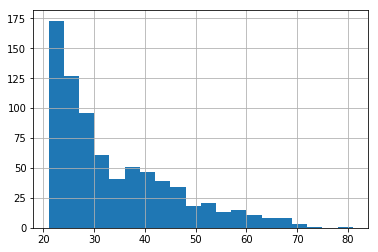

In [13]:
diabets['Age'].hist(bins=20)

In [14]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_prgnt,plasma_glucos,blood_pressior,triceps,insulin,BMI,pedigree,age,age_bucket]

In [16]:
x_data = diabets.drop('Class',axis=1)

In [17]:
x_labels = diabets['Class']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test=train_test_split(x_data,x_labels,test_size = .3,random_state=101)

### after defining feature column its time to input function

In [20]:
input_funcion = tf.estimator.inputs.pandas_input_fn(x=X_train,y = y_train,batch_size=10,num_epochs=1000,shuffle=True)

### to do classification we determine ,create ,our model

In [21]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MASOUD\\AppData\\Local\\Temp\\tmp6n7ukhs4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000179E39B0F98>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### now that we created model we should train it 

In [22]:
model.train(input_fn=input_funcion,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\MASOUD\AppData\Local\Temp\tmp6n7ukhs4\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 298.29
INFO:tensorflow:loss = 5.0286155, step = 101 (0.330 sec)
INFO:tensorflow:global_step/sec: 453.504
INFO:tensorflow:loss = 5.3963175, step = 201 (0.227 sec)
INFO:tensorflow:global_step/sec: 435.564
INFO:tensorflow:loss = 4.4341044, step = 301 (0.229 sec)
INFO:tensorflow:global_step/sec: 462.611
INFO:tensorflow:loss = 4.6736584, step = 401 (0.221 sec)
INFO:tensorflow:global_step/sec: 426.724
INFO:tensorflow:loss = 7.1995144, step = 501 (0.229 sec)
INFO:tensorflow:global_step/sec: 416.375
INFO:tensorflow:loss = 5.125724, step = 601 (0.240 sec)
INFO:tensorflow:global_step/se

In [23]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size =10,num_epochs=1000,shuffle=False)

In [24]:
result = model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-24-14:46:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MASOUD\AppData\Local\Temp\tmp6n7ukhs4\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-24-14:47:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.80119336, auc_precision_recall = 0.65980613, average_loss = 0.52593654, global_step = 1000, label/mean = 0.35064936, loss = 5.259365, prediction/mean = 0.38330996


In [25]:
result

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80119336,
 'auc_precision_recall': 0.65980613,
 'average_loss': 0.52593654,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.259365,
 'prediction/mean': 0.38330996}

In [26]:
pred_innput_func = tf.estimator.inputs.pandas_input_fn(x = X_test,batch_size=10,num_epochs=1,shuffle=False)

In [27]:
predictions = model.predict(pred_innput_func)

In [28]:
preds = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MASOUD\AppData\Local\Temp\tmp6n7ukhs4\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [29]:
preds =list(preds)

In [30]:
_preds =map(lambda x:x['class_ids'][0],preds)

In [31]:
list(_preds)

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1]

In [32]:
list(_preds)

[]

In [33]:
pred=map(lambda x:x['class_ids'],list(predictions))

In [34]:
list(pred)

[]

In [35]:
foo = [1,1,3]
fee= map(lambda fi:fi*3,foo)

In [36]:
fee

In [37]:
list(fee)

[3, 3, 9]

In [44]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MASOUD\\AppData\\Local\\Temp\\tmpgfco0vo7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000179E3B6FFD0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [45]:
dnn_model.train(input_fn=input_funcion,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\MASOUD\AppData\Local\Temp\tmpgfco0vo7\model.ckpt.
INFO:tensorflow:loss = 8.136716, step = 1
INFO:tensorflow:global_step/sec: 297.29
INFO:tensorflow:loss = 6.8190417, step = 101 (0.340 sec)
INFO:tensorflow:global_step/sec: 428.88
INFO:tensorflow:loss = 5.4899206, step = 201 (0.232 sec)
INFO:tensorflow:global_step/sec: 439.248
INFO:tensorflow:loss = 5.0622506, step = 301 (0.227 sec)
INFO:tensorflow:global_step/sec: 433.535
INFO:tensorflow:loss = 5.453338, step = 401 (0.231 sec)
INFO:tensorflow:global_step/sec: 440.188
INFO:tensorflow:loss = 6.206229, step = 501 (0.227 sec)
INFO:tensorflow:global_step/sec: 436.371
INFO:tensorflow:loss = 7.1881, step = 601 (0.229 sec)
INFO:tensorflow:global_step/sec: 46

#### now time to evaluation

In [46]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1000,shuffle=False)

In [47]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-24-15:16:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MASOUD\AppData\Local\Temp\tmpgfco0vo7\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-24-15:16:47
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6839827, accuracy_baseline = 0.64935064, auc = 0.77168727, auc_precision_recall = 0.5931091, average_loss = 0.55304307, global_step = 1000, label/mean = 0.35064936, loss = 5.530431, prediction/mean = 0.3194061


{'accuracy': 0.6839827,
 'accuracy_baseline': 0.64935064,
 'auc': 0.77168727,
 'auc_precision_recall': 0.5931091,
 'average_loss': 0.55304307,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.530431,
 'prediction/mean': 0.3194061}

In [48]:
dnn_preds = dnn_model.predict(input_fn=pred_innput_func)

In [50]:
list(dnn_preds)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MASOUD\AppData\Local\Temp\tmpgfco0vo7\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.48953626], dtype=float32),
  'logits': array([-0.04186113], dtype=float32),
  'probabilities': array([0.5104638, 0.4895363], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4900102], dtype=float32),
  'logits': array([-0.03996466], dtype=float32),
  'probabilities': array([0.50998986, 0.4900102 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.485309], dtype=float32),
  'logits': array([-0.05878086], dtype=float32),
  'probabilities': array([0.514691, 0.485309], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.26075104], dtype=float32),
  'logits': array([-1.0420686], dtype=float32),
  'probabilities': array([0.73924893, 0.26075104], dtype=float32)},
 {'class_ids':